# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data (NBA_Perf_22 and nba_salaries_22), merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [7]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk

#Load the data
salary_data = pd.read_csv("2025_salaries.csv", header=1)
#print(salary_data.head())

stats = pd.read_csv("nba_2025.txt", sep=',', encoding='latin-1')
#print(stats.head())

In [8]:
#Inner merge on player name
merged_data = pd.merge(salary_data, stats, on='Player')
merged_data.head(7)

,Player,Tm,2025-26,Rk,Age,Team,Pos,G,GS,MP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards,Player-additional
0,Garrison Mathews,IND,"$131,970",398.0,29.0,IND,SG,15.0,1.0,196.0,...,17.0,10.0,6.0,3.0,3.0,19.0,78.0,0.0,NaN,mathega01
1,Garrison Mathews,IND,"$131,970",398.0,29.0,IND,SG,15.0,1.0,196.0,...,17.0,10.0,6.0,3.0,3.0,19.0,78.0,0.0,NaN,mathega01
2,Mac McClung,IND,"$164,060",459.0,27.0,2TM,SG,4.0,0.0,47.0,...,5.0,2.0,5.0,2.0,3.0,8.0,23.0,0.0,NaN,mccluma01
3,Mac McClung,IND,"$164,060",459.0,27.0,IND,SG,3.0,0.0,34.0,...,4.0,1.0,5.0,1.0,2.0,6.0,19.0,0.0,NaN,mccluma01
4,Mac McClung,IND,"$164,060",459.0,27.0,CHI,SG,1.0,0.0,13.0,...,1.0,1.0,0.0,1.0,1.0,2.0,4.0,0.0,NaN,mccluma01
5,Monte Morris,IND,"$321,184",470.0,30.0,IND,PG,6.0,0.0,65.0,...,7.0,9.0,1.0,1.0,2.0,3.0,18.0,0.0,NaN,morrimo01
6,E.J. Liddell,PHO,"$706,898",461.0,25.0,BRK,PF,10.0,0.0,49.0,...,11.0,0.0,1.0,0.0,0.0,4.0,22.0,0.0,NaN,liddeej01


In [9]:
#Drop variables that will not be needed

merged_data = merged_data.drop(columns=['Tm','Team','Pos','Age','G','FGA','3PA','2PA','FTA','PF','Trp-Dbl','Awards']) #dropped these columns 
#im looking at 'eFG%'=effective field goal %, 'MP'=minutes playes,'TRB'=total rebounds, and 'PTS'=points scored as potential variables to cluster players on.
merged_data.dropna(inplace=True) #drop any rows with missing values
merged_data.head()

,Player,2025-26,Rk,GS,MP,FG,FG%,3P,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Player-additional
0,Garrison Mathews,"$131,970",398.0,1.0,196.0,21.0,0.404,17.0,0.370,4.0,...,0.826,2.0,15.0,17.0,10.0,6.0,3.0,3.0,78.0,mathega01
1,Garrison Mathews,"$131,970",398.0,1.0,196.0,21.0,0.404,17.0,0.370,4.0,...,0.826,2.0,15.0,17.0,10.0,6.0,3.0,3.0,78.0,mathega01
2,Mac McClung,"$164,060",459.0,0.0,47.0,9.0,0.360,2.0,0.167,7.0,...,0.750,0.0,5.0,5.0,2.0,5.0,2.0,3.0,23.0,mccluma01
3,Mac McClung,"$164,060",459.0,0.0,34.0,7.0,0.389,2.0,0.200,5.0,...,0.750,0.0,4.0,4.0,1.0,5.0,1.0,2.0,19.0,mccluma01
5,Monte Morris,"$321,184",470.0,0.0,65.0,7.0,0.350,2.0,0.250,5.0,...,0.500,1.0,6.0,7.0,9.0,1.0,1.0,2.0,18.0,morrimo01


In [10]:
#Drop duplicates 
duplicates = merged_data[merged_data.duplicated(subset='Player', keep=False)] #identify duplicates
merged_data = merged_data.drop_duplicates(subset='Player')
#merged_data.head()

#Rename salary column and delete string characters in salary column (making that column numeric)
merged_data.rename(columns={'2025-26':'Salary'}, inplace=True) #rename salary column
merged_data['Salary'] = merged_data['Salary'].str.replace('$','').str.replace(',','').astype(float)
merged_data.head()

,Player,Salary,Rk,GS,MP,FG,FG%,3P,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Player-additional
0,Garrison Mathews,131970.0,398.0,1.0,196.0,21.0,0.404,17.0,0.370,4.0,...,0.826,2.0,15.0,17.0,10.0,6.0,3.0,3.0,78.0,mathega01
2,Mac McClung,164060.0,459.0,0.0,47.0,9.0,0.360,2.0,0.167,7.0,...,0.750,0.0,5.0,5.0,2.0,5.0,2.0,3.0,23.0,mccluma01
5,Monte Morris,321184.0,470.0,0.0,65.0,7.0,0.350,2.0,0.250,5.0,...,0.500,1.0,6.0,7.0,9.0,1.0,1.0,2.0,18.0,morrimo01
6,E.J. Liddell,706898.0,461.0,0.0,49.0,8.0,0.471,4.0,0.364,4.0,...,0.667,3.0,8.0,11.0,0.0,1.0,0.0,0.0,22.0,liddeej01
8,Olivier-Maxence Prosper,1002360.0,325.0,1.0,398.0,61.0,0.492,23.0,0.418,38.0,...,0.870,25.0,58.0,83.0,19.0,8.0,4.0,20.0,185.0,prospol01


In [11]:
#Look at missing values in each column
merged_data.isnull().sum() #all 0


Player               0
Salary               0
Rk                   0
GS                   0
MP                   0
FG                   0
FG%                  0
3P                   0
3P%                  0
2P                   0
2P%                  0
eFG%                 0
FT                   0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PTS                  0
Player-additional    0
dtype: int64

In [12]:
#Lambda Functions: create new column in dataframe that is the result of applying a simple operation to an existing column 
merged_data['Salary_in_thousands'] = merged_data['Salary'].apply(lambda x: x/1000) #this is salary divided by 1000
print(merged_data[['Player', 'Salary_in_thousands']].head())
#we created a new column with the salary divided by 1000

                    Player  Salary_in_thousands
0         Garrison Mathews              131.970
2              Mac McClung              164.060
5             Monte Morris              321.184
6             E.J. Liddell              706.898
8  Olivier-Maxence Prosper             1002.360


In [13]:
#Scale the variables we will cluster. I've chosen to cluster on 'MP', 'TRB', and 'PTS'. minutes played, total rebounds, and points scored.
# look at the range of column salary 
merged_data['Salary'].min() #this is 131,970.0
merged_data['Salary'].max() #this is 59,606,817.0

scaled_data = sk.preprocessing.scale(merged_data[['MP','PTS','Salary']]) #this scales the variables from 0 to 1.
#scaled_data = sk.preprocessing.scale(merged_data[['MP','TRB','PTS','Salary']])
print(scaled_data[:5]) #this looks at the first 5 rows for the scaled varibales. 
#I'm choosing to use standardization instead of normalization (min-max scaling) because the range of the salary variable is very large and we also have outliers.


[[-1.38294876 -1.08186505 -0.89854972]
 [-1.67716963 -1.24893364 -0.89619255]
 [-1.64162617 -1.2641217  -0.88465102]
 [-1.67322035 -1.25197125 -0.85631842]
 [-0.98407215 -0.75684069 -0.83461528]]


In [14]:
#Run the clustering algo with your best guess for K
mymodel = sk.cluster.KMeans(n_clusters=3, random_state=42).fit(scaled_data)


In [15]:
#View the results
print(mymodel.labels_[:30]) #this shows the cluster labels for each player (0, 1, or 2)
print(mymodel.cluster_centers_) #this shows the center of each cluster in 3D space
print(mymodel.inertia_) #this measures variance within clusters (intra) to see how well the clusters fit the data (lower is better) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 0 2 0 0 2 2]
[[-0.84283526 -0.78800719 -0.44434577]
 [ 1.15830285  1.6418955   1.91759257]
 [ 0.69674133  0.43405043 -0.14092648]]
356.4468324111372


In [17]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters
import plotly.express as px
fig = px.scatter_3d(merged_data, x='MP', y='Salary', z='PTS', color=mymodel.labels_, title='MP vs Salary vs PTS for NBA Players')
#this creates a 3D scatter plot with minutes played on the x-axis, salary on the y-axis, and points scored on the z-axis. The color reprsents which of the 3 clusters the players are in.
fig.show(renderer='browser')

In [20]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores

#calculate the total sum of squares, this measures total variance in the data. Formula: TSS = sum of squared distances from each point to the overall mean of the data
total_sum_of_squares = np.sum((scaled_data - np.mean(scaled_data))**2)
print(f'Total sum of squares (TSS): {total_sum_of_squares}')

#calculate the between cluster sum of squares, this measures variance between clusters. Formula: between-cluster sum of squares (BSS) = total sum of squares (TSS) - within cluster sum of squares (WSS = inertia)
between_ss = total_sum_of_squares - mymodel.inertia_
print(f'Between cluster sum of squares (BSS): {between_ss}')

#calculate variance explained. The higher the better, it means the clusters explain more of the variance in the data. Formula: Variance explained = BSS / TSS
var_explained = between_ss / total_sum_of_squares
print(f'Variance Explained: {var_explained}')

#calculate silhouette score, this measures how similar a datapoint is to its own cluster compared to other clusters. It is another way to measure the optimal number of clusters.
# The higher the better the clustering (min=-1, max=1). Formula: silhouette score = (b - a) / max(a, b) 
sil_score = sk.metrics.silhouette_score(scaled_data, mymodel.labels_)
print(f'Silhouette Score: {sil_score}') #when k=3, my initial guess, the silhouette score is 0.45


Total sum of squares (TSS): 1188.0
Between cluster sum of squares (BSS): 831.5531675888628
Variance Explained: 0.699960578778504
Silhouette Score: 0.4513053802999613


In [26]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient

#SILHOUETTE METHOD: calulate silhouette scores for k=3 to k=10 to identify optimal number of clusters 
silhouette_scores = []
for k in range(3,11):
    model = sk.cluster.KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    sil_score = sk.metrics.silhouette_score(scaled_data, model.labels_)
    silhouette_scores.append(sil_score)

print(f'Silhouette Scores for k=3 to k=10: {silhouette_scores}')
print(f'Optimal number of clusters based on silhouette score: {max(silhouette_scores) + 3}') #add 3 because we started at k=3 

#ELBOW METHOD: calculate inertia for k=3 to k=10 to identify optimal number of clusters
inertia_values = []
for k in range(3,11):
    model = sk.cluster.KMeans(n_clusters=k, random_state=42).fit(scaled_data)
    inertia_values.append(model.inertia_)
print(f'Inertia values for k=3 to k=10: {inertia_values}')

Silhouette Scores for k=3 to k=10: [0.4513053802999613, 0.4682797892943385, 0.41310962026856207, 0.37132708551733573, 0.33470738434967906, 0.358076890278751, 0.36018843162679093, 0.3429241158043791]
Optimal number of clusters based on silhouette score: 3.4682797892943387
Inertia values for k=3 to k=10: [356.4468324111372, 279.801092906299, 209.5086414717909, 179.77900597154428, 162.366363561638, 137.0959989288251, 118.9193926763776, 118.29970712750863]


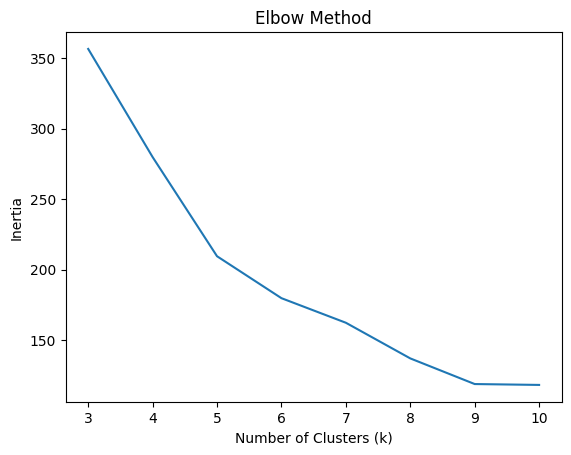

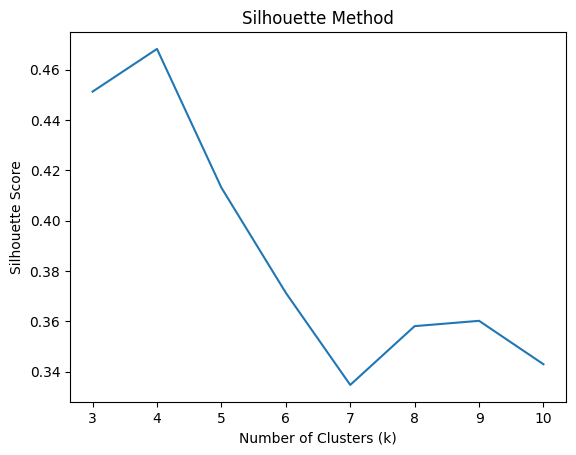

In [27]:
#Visualize the results of the elbow method
import matplotlib.pyplot as plt
fig_elbow = plt.plot(range(3,11), inertia_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia') #the lower the inertia, the better
plt.title('Elbow Method')
plt.show()

#Visualize the results of the silhouette method
fig_silhouette = plt.plot(range(3,11), silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score') #the higher the score, the better
plt.title('Silhouette Method')
plt.show()

In [54]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results
model_optimal = sk.cluster.KMeans(n_clusters=4, random_state=42).fit(scaled_data) #retrain model with k=4. The silhouette method suggested k=4 and elbow method suggested k=5.

fig_optimal = px.scatter_3d(merged_data, x='MP', y='Salary', z='PTS', color=model_optimal.labels_, title='Minutes Played vs Salary vs Points Scored for NBA Players (k=4)')
fig_optimal.show(renderer='browser')

In [31]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores

#calculate the total sum of sqaures (TSS) for the new optimal model 
total_sum_of_squares_optimal = total_sum_of_squares #this is the same as before because we are using the same data.

#calculate the between cluster sum of squares (BSS) 
between_ss_optimal = total_sum_of_squares_optimal - model_optimal.inertia_
print(f'Between cluster sum of squares (BSS): {between_ss_optimal}')

#calculate variance explained 
var_explained_optimal = between_ss_optimal / total_sum_of_squares_optimal
print(f'Variance Explained: {var_explained_optimal}')

#calculate silhouette score 
sil_score_optimal = sk.metrics.silhouette_score(scaled_data, model_optimal.labels_)
print(f'Silhouette Score: {sil_score_optimal}') #when k=4, the silhouette score is 0.47


Between cluster sum of squares (BSS): 978.491358528209
Variance Explained: 0.8236459246870447
Silhouette Score: 0.41310962026856207


In [ ]:
# look for the player(s) based on graph and model results to identify player names.
matched = merged_data[merged_data['MP'] == 1873]
matched

,Player,Salary,Rk,GS,MP,FG,FG%,3P,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS,Player-additional,Salary_in_thousands
65,Toumani Camara,2221677.0,78.0,56.0,1873.0,261.0,0.441,146.0,0.37,115.0,...,97.0,203.0,300.0,144.0,56.0,25.0,111.0,734.0,camarto01,2221.677


In [52]:
#Use the model to select players for Mr. Rooney to consider

    # Examples that are not good choices (3 or 4) 
print('Bradley Beal, Anthony Davis, and Paul George are not good choices becuase they have high salaries but low minutes played and points scored relative to other players.')
    # Several options that are good choices (3 or 4)
print('Keyonte George, Shaedon Sharpe, and Kon Knueppel are good choices because they have relatively low salaries but high minutes played and points scored compared to other players.')
    # Several options that could work, assuming you can't get the players in the good category (3 or 4)
print('Toumani Camara, Victor Wembanyama, and Toumani Camara are options that could work because they have relatively low salaries but either have high minutes played/low points scored or low minutes played/high points scored compared to other players.')

Bradley Beal, Anthony Davis, and Paul George are not good choices becuase they have high salaries but low minutes played and points scored relative to other players.
Keyonte George, Shaedon Sharpe, and Kon Knueppel are good choices because they have relatively low salaries but high minutes played and points scored compared to other players.
Toumani Camara, Victor Wembanyama, and Toumani Camara are options that could work because they have relatively low salaries but either have high minutes played/low points scored or low minutes played/high points scored compared to other players.


In [53]:
#Write up the results in a separate notebook with supporting visualizations and 
#an overview of how and why you made the choices you did. This should be at least 
#500 words and should be written for a non-technical audience.